In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize
import itertools
import seaborn as sns

In [2]:
v = np.genfromtxt('MDA3_data/votes.txt')
votes = 2*(v-0.5)

In [3]:
masks = [1 << i for i in range(9)] 
words = np.array([[int((i & m)>0) for m in masks] for i in range(2**9)])
words = 2*(words - 0.5)

In [52]:
# # votes_cent = votes[:800] - means
# # # stds = np.std(votes[:800],0)
# # stds = np.std(votes_cent,0)
# # cov_v = (votes_cent.T @ votes_cent)
# # cor_v = cov_v/np.diag(cov_v)
# means = np.mean(votes[:800],0)
# cor_v = np.corrcoef(votes[:800].T)
# pv_flat = cor_v[np.triu_indices(9,1)]

In [54]:
cov_v = (votes[:800].T @ votes[:800])
cor_v = cov_v/np.diag(cov_v)
pv_flat = cor_v[np.triu_indices(9,1)]
means = np.mean(votes[:800],0)

In [55]:
def probs(J, h):
    p=np.exp(np.sum((words @ J)*words,1) + np.sum(h * words, 1)) # compute the not normalized probabilities
    return p / np.sum(p) # return normalized

In [56]:
def F(x):
    # this is the function to find the root of. 
#     as input get  the flattened upper triang of J
    J = np.zeros_like(cor_v)# "unflatten it"
#     J = np.zeros_like(cormat)
    h = np.zeros_like(means)
    J[np.triu_indices(9,1)]=x[:36]
    h = x[36:]# put input in the right place
    p = probs(J, h) # compute probabilities
    pv_th = (words.T * p) @ words #compute the model correlations with this given J
    mean_th = np.sum(words.T * p, 1)
    res = np.empty(45)
    res[:36] = pv_th[np.triu_indices(9,1)] - pv_flat
    res[36:] = mean_th - means
    return res # return difference between model correlations and data correlations


In [57]:
# find root of F - here I'm using scipy.optimize but you can use whatever!
a = optimize.newton_krylov(F,np.zeros(45))
# a = optimize.newton_krylov(F,np.append(cor_v[np.triu_indices(9,1)].flatten(),means))

In [58]:
# convert result back to matrix form
J_star = np.zeros_like(cor_v)
J_star[np.triu_indices(9,1)]=a[:36]
means_star = a[36:]

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9')]

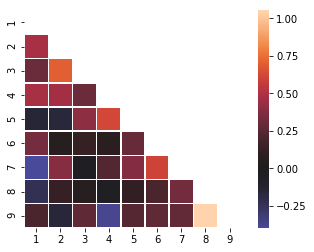

In [79]:
mask = np.triu(np.ones_like(J_star, dtype=bool))
heatmap = sns.heatmap(J_star.T, mask=mask, square=True, linewidths=.5, center = 0)
heatmap.set_xticklabels(labels = range(1,10)) 
heatmap.set_yticklabels(labels = range(1,10)) 

#### Comparison of the models

In [69]:
J_star_1 = np.load('3.6_J_star_part1.npy')

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9')]

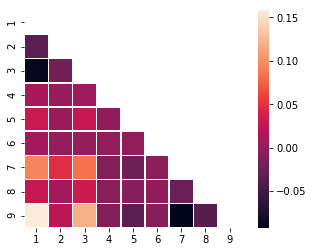

In [80]:
mask = np.triu(np.ones_like(J_star, dtype=bool))
heatmap = sns.heatmap(J_star.T - J_star_1.T, mask=mask, square=True, linewidths=.5)
heatmap.set_xticklabels(labels = range(1,10)) 
heatmap.set_yticklabels(labels = range(1,10)) 

([<matplotlib.axis.YTick at 0x12870b400>,
 <a list of 4 Text yticklabel objects>)

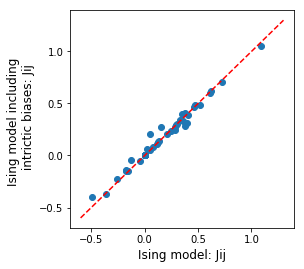

In [82]:
plt.figure(figsize = (4,4))
plt.scatter(J_star_1, J_star)
plt.plot(np.arange(-0.6, 1.4, 0.1), np.arange(-0.6, 1.4, 0.1), ls = '--', color = 'red')
plt.xlabel('Ising model: Jij', fontsize = 12)
plt.ylabel('Ising model including \n intrictic biases: Jij', fontsize = 12)
plt.yticks([-0.5,0,0.5,1])
# plt.grid()
# plt.gca().set_aspect('equal', adjustable='box')
# plt.draw()

### Test the prediction

In [63]:
P_train = probs(J_star, means_star)

In [64]:
test = votes[800:]
index = []
for i, word in enumerate(words):
    for j, word1 in enumerate(test):
        if tuple(word) == tuple(word1):
            if i in index: continue
            else: index.append(i)

In [87]:
likelihood = np.sum(np.log(P_train[index]))

In [88]:
likelihood

-208.9337346590867